In [53]:
import numpy as np
import statistics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

In [54]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier as KN
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [55]:
data = pd.read_csv(r"BodyMeasurementsData_WebScrapped.csv")

In [56]:
data["Body Shape"].replace("Banana",1, inplace=True)
data["Body Shape"].replace("Apple",2, inplace=True)
data["Body Shape"].replace("Pear",3, inplace=True)
data["Body Shape"].replace("Hourglass",4, inplace=True)

In [57]:
data = data.dropna(how='any')

[0.19172434 0.23622156 0.16169929 0.20957747 0.20077735]


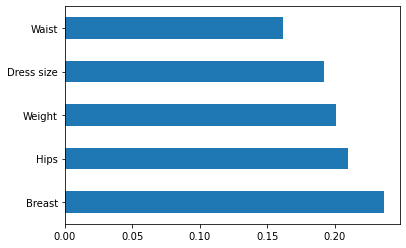

In [58]:
features1=data.drop(["Body Shape","Name","Bra size","Height"],axis=1)
target1 = data["Body Shape"] 
model = ExtraTreesClassifier(n_estimators=100)
model.fit(features1,target1)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=features1.columns)
feat_importances.nlargest(1000).plot(kind='barh')
plt.show()

In [59]:
target1.shape

(177,)

In [60]:
features1.shape

(177, 5)

In [61]:
data["Body Shape"].value_counts()

4.0    99
1.0    56
2.0    13
3.0     9
Name: Body Shape, dtype: int64

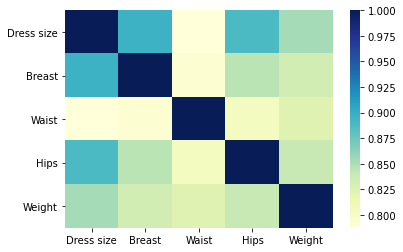

In [62]:
sns.heatmap(features1.corr(),cmap="YlGnBu")

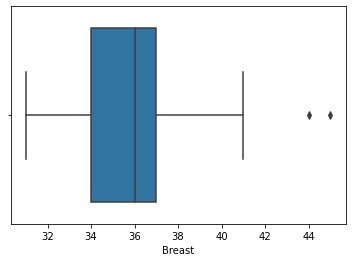

In [63]:
import seaborn as sns
sns.boxplot(x=features1['Breast'])

In [64]:
X_train,X_test,Y_train,Y_test = train_test_split(features1,target1,test_size=0.3,random_state=101)

In [65]:
X_train.head()

,Dress size,Breast,Waist,Hips,Weight
129,4.0,34,24.0,34,53
64,16.0,41,33.0,40,77
105,6.0,36,26.0,36,56
56,4.0,35,24.0,35,57
141,6.0,35,26.0,37,58


In [66]:
modelSV = SVC(kernel='linear')
modelSV.fit(X_train,Y_train)
pred_svm = modelSV.predict(X_test)

accSV =accuracy_score(pred_svm, Y_test)
print("Accuracy" , accSV)

result_svm = cross_val_score(modelSV, features1,target1,cv=10, scoring = "accuracy")
print("Cross_val score", result_svm.mean())

#y_pred = cross_val_predict(modelRF,features,target, cv=10)
#sns.heatmap(confusion_matrix(y_pred,target),cmap="summer",annot=True,fmt="3.0f")

Accuracy 0.7592592592592593


C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Cross_val score 0.7624183006535947


In [51]:
modelNB = GaussianNB()
#To fit this data of training set of X and Y to the model
modelNB.fit(X_train,Y_train)
#To define the variable pred_nb to predict in boolean value 
pred_nb = modelNB.predict(X_test)
accNB = accuracy_score(pred_nb, Y_test)
print("Accuracy ", accNB)

#To find the score by cross evaluation
result_NB = cross_val_score(modelNB, features1, target1, cv=22,scoring="accuracy")
print("cross val score ", result_NB.mean())

Accuracy  0.6666666666666666


C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=22.
  warnings.warn(("The least populated class in y has only %d"


cross val score  0.7228535353535354


In [52]:
#Using variable modelLR for logistic Regression
modelLR = LogisticRegression()
#To fit this data of training set of X and Y to the model
modelLR.fit(X_train, Y_train)
predLR= modelLR.predict(X_test)
#To test how accurately the predition of LR matches with the original data set 
accLR=accuracy_score(Y_test, predLR)
print("Accuracy =  {:.2f} ".format( accLR))
y_pred = cross_val_predict(modelLR,features1, target1,cv=10)
result_LR = cross_val_score(modelLR,features1, target1, cv=10, scoring="accuracy" )
print("Cross val Score = {:.2f}".format(result_LR.mean()))

Accuracy =  0.74 


C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale t

Cross val Score = 0.74


C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
modelKN = KN(n_neighbors =22)
modelKN.fit(X_train,Y_train)
pred_Knn = modelKN.predict(X_test)
accKNN= accuracy_score(pred_Knn,Y_test)
print(accKNN)
result_knn= cross_val_score(modelKN,features1,target1,cv=10,scoring="accuracy")
print("The cross val score = ", result_knn.mean())

C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


0.7592592592592593
The cross val score =  0.7571895424836601


In [54]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
modelLD = LinearDiscriminantAnalysis()
modelLD.fit(X_train, Y_train)
pred_ld= modelLD.predict(X_test)
#To test how accurately the predition of LR matches with the original data set 
accLD=accuracy_score(Y_test, pred_ld)
print("Accuracy =  {:.2f} ".format(accLD))
y_pred = cross_val_predict(modelLD,features1, target1,cv=10)
result_LD = cross_val_score(modelLD,features1, target1, cv=10, scoring="accuracy" )
print("Cross val Score = {:.2f}".format(result_LD.mean()))

Accuracy =  0.78 


C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Cross val Score = 0.79


In [56]:
models= pd.DataFrame({ 
"Model" : ["SVM","Bayers","LogisticRegression","KNN","LinearDiscriminant"],
"Cross Validation Score" : [result_svm.mean(),result_NB.mean(),result_LR.mean(),result_knn.mean(), result_LD.mean()],
"Accuracy": [accSV,accNB,accLR,accKNN, accLD]
})

In [57]:
models.sort_values(by="Accuracy")

,Model,Cross Validation Score,Accuracy
1,Bayers,0.722854,0.666667
2,LogisticRegression,0.739542,0.740741
0,SVM,0.729739,0.759259
3,KNN,0.757190,0.759259
4,LinearDiscriminant,0.790196,0.777778


In [58]:
final_pred = np.array([])
for i in range(0,len(X_test)):
    final_pred = np.append(final_pred, statistics.mode([pred_svm[i], pred_Knn[i], pred_ld[i]]))

In [59]:
accL =accuracy_score(final_pred, Y_test)

In [60]:
accL

0.7777777777777778

In [62]:
pickle.dump(modelLD, open('BodyShape.pkl','wb'))
model = pickle.load(open('BodyShape.pkl','rb'))
print(model.predict([[2,33,24,35,54.8]]))

[1.]
